In [139]:
## Project Overview

# This is my first data analysis project, built around a dataset from Kaggle. The primary goal was to practice and reinforce concepts from *Data Analysis with Python* by Wes McKinney.

### Objectives:
# - Load and clean the data
# - Perform exploratory data analysis (EDA)
# - Visualise patterns using matplotlib and seaborn
# - Answer basic analytical questions about the dataset


In [76]:
# Importing my tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 
sns.set_style("whitegrid") 


In [77]:
# Data loading

df = pd.read_csv("downloads/netflix_titles.csv/netflix_titles.csv")
df.head()

# Just using head to take a sneak peak at the dataset I am dealing with, so we have an unique show ID, the type of show movie or TV show
# A title , the director, a cast etc

# Already I can spot a whole bunch of NaNs, so this dataset needs some cleaning.

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [78]:
df.dtypes # Just getting an idea of the data type for each column

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [79]:
df.shape # Using the shape attribute I'm getting an idea of how big this csv file was, so 8807 movies or tv shows etc with 12 columns of info.

(8807, 12)

In [80]:
df.isnull().sum() # I am getting an idea of just exactly how many missing values there are in each Column, the director column is missing a lot of data.

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [81]:
# I don't want to throw away the rows that doesn't have a director name, so I'm going to replace it with Unknown to practically deal with NaNs.
# Let's just replace all NaNs with Unknown, because functions behave wierdly with NaNs, and I don't want to change the data shape too much.

df.fillna('Unknown', inplace=True)
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [82]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [83]:
# I'm going to check for any duplicated data.

df.duplicated().sum()

np.int64(0)

In [84]:
# One last thing, I can change the date_added column to contain datetime objects, which will be nice for timeseries later on.

df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce') # Doing errors = "coerce" it makes invalid date formats like unknown -> NaT (Not a Time) , so it gets ignored

In [85]:
df.dtypes # As you can see it is now date time.

show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
dtype: object

In [86]:
# After exploring the general shape of the dataset I am now proceeding with univariate and bivariate analysis.

# Some questions that are interesting to me are:

# Q. What are the most common ratings on Netflix?
# Q. How are title ratings distributed amongst movies and TV-shows?
# Q. How have title ratings changed over time?
# Q. Which ratings dominate different countries? (In particular South-East Asia)
# Q. What are the top 10 countries that feature the most titles on Netflix?

In [87]:
# What are the most common ratings?

df["rating"].value_counts() # So it appears to be the case that the most common netflix rating is TV-MA 

rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
Unknown        4
NC-17          3
UR             3
66 min         1
74 min         1
84 min         1
Name: count, dtype: int64

In [88]:
# I just noticed an issue with the ratings column. There are a bunch of invalid ratings, 66 and 74 minutes aren't ratings, they must have been
# incorrectly entered into the ratings column rather than the duration.

valid_ratings = ['TV-MA', 'TV-14', 'TV-PG', 'R', 'PG-13', 'TV-Y7', 'TV-Y', 'PG', 'TV-G', 'NR', 'G', 'TV-Y7-FV', 'NC-17', 'UR', 'Unknown']

df = df[df["rating"].isin(valid_ratings)]
df["rating"].value_counts() # Look at the result, I have now discarded the invalid ratings.

rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
Unknown        4
NC-17          3
UR             3
Name: count, dtype: int64

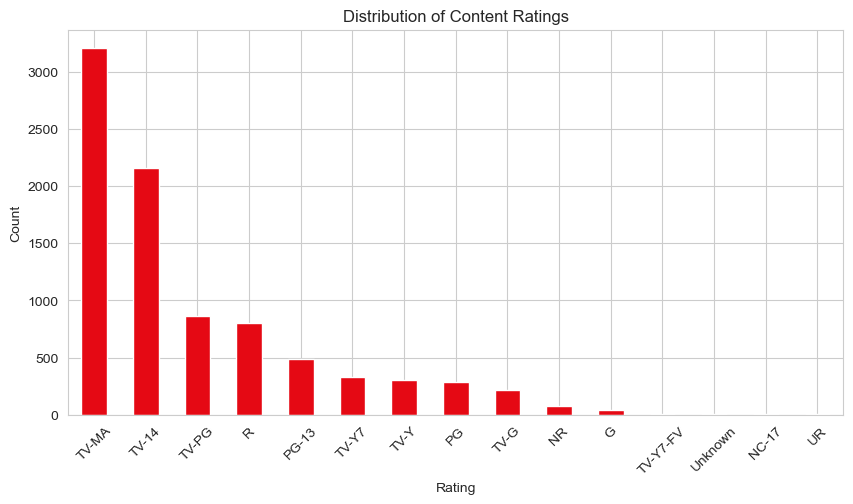

In [89]:
# Visualisation of the ratings data
df['rating'].value_counts().plot(kind='bar', figsize=(10,5), color='#E50914')
plt.title("Distribution of Content Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


In [90]:
# So I have a basic idea of how the content ratings are distributed amongst the ratings column, an interesting question could be how do ratings
# differ between TV shows and movies.

# Quickly checking what are the different "types" of shows in the type column

df["type"].value_counts() # So fortunately, no issues, it is simply split into movies and tv-shows, no odd categories to handle.

type
Movie      6128
TV Show    2676
Name: count, dtype: int64

In [91]:
type_and_rating = df.groupby(['type', 'rating']).size().unstack(fill_value=0) # Here I grouped the data by type and rating columns, size counts the number of occurrences in each row. Very important.
type_and_rating


rating,G,NC-17,NR,PG,PG-13,R,TV-14,TV-G,TV-MA,TV-PG,TV-Y,TV-Y7,TV-Y7-FV,UR,Unknown
type,,,,,,,,,,,,,,,
Movie,41,3,75,287,490,797,1427,126,2062,540,131,139,5,3,2
TV Show,0,0,5,0,0,2,733,94,1145,323,176,195,1,0,2


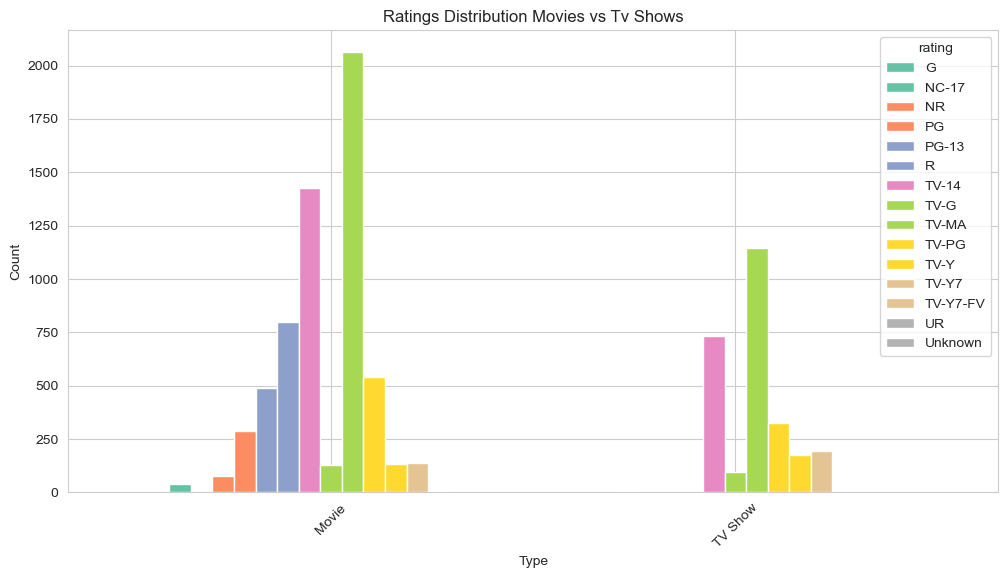

In [92]:
# I want to visualise how the ratings differ between movies and TV-shows , this is a case of bivariate analysis. 
type_and_rating.plot(kind='bar', figsize=(12, 6), colormap='Set2', width=0.8)
plt.title('Ratings Distribution Movies vs Tv Shows')
plt.xlabel('Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [93]:
# Q. Are certain ratings more common in recent years than later years?

# Essentially, what I will have to do here is try and discover how ratings differs with time. So I will be working with 2 columns: release year + rating.

year_against_rating = df.groupby(["release_year","rating"]).size()
year_against_rating


release_year  rating
1925          TV-14       1
1942          TV-14       2
1943          TV-PG       3
1944          TV-14       2
              TV-PG       1
                       ... 
2021          TV-G       21
              TV-MA     270
              TV-PG      45
              TV-Y       26
              TV-Y7      33
Length: 440, dtype: int64

In [94]:
# Here I am just trying to see if I prefer to see the data unstacked or not, there are a lot of NaNs meaning in certain years, many ratings were not recorded.
year_against_rating_v2 = df.groupby(["release_year","rating"]).size().unstack(fill_value = 0) # I did fill value because I don't want to work with NaNs
year_against_rating_v2

rating,G,NC-17,NR,PG,PG-13,R,TV-14,TV-G,TV-MA,TV-PG,TV-Y,TV-Y7,TV-Y7-FV,UR,Unknown
release_year,,,,,,,,,,,,,,,
1925,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1942,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0
1943,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0
1944,0,0,0,0,0,0,2,0,0,1,0,0,0,0,0
1945,0,0,0,0,0,0,2,0,2,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017,1,0,2,15,32,73,251,26,451,111,31,37,0,0,1
2018,2,1,1,31,30,52,268,26,549,105,41,40,1,0,0
2019,1,0,0,12,19,39,252,23,500,98,50,36,0,0,0


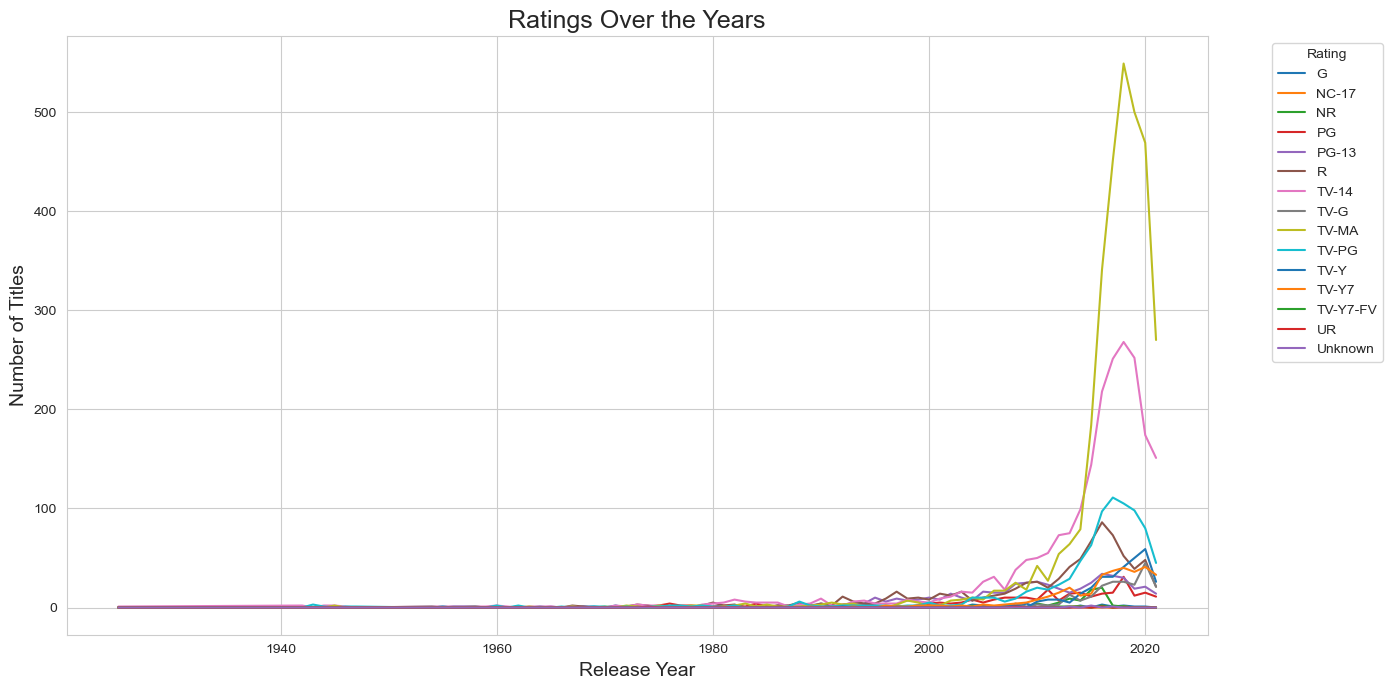

In [137]:
# Created a line graph to show how the ratings are changing over the years
year_against_rating_v2.plot(kind='line', figsize=(14,7))
plt.title("Ratings Over the Years", fontsize=18)
plt.xlabel("Release Year", fontsize=14)
plt.ylabel("Number of Titles", fontsize=14)
plt.legend(title="Rating", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [96]:
# The graph is cool, but is it particularly helpful. What I mean is that prior to say 1980, there isnt a large amount of variation in the y axis.

# Would it be worth filtering out particular years, and remaking this graph with say only 1980s onwards to get a more zoomed in view of how the y axis
# varies with time.

# let me first filter the release_years column to only include titles after 1980

recent_data = df[df['release_year'] >= 1980]

# Group and reshape again
year_against_rating_recent = recent_data.groupby(['release_year', 'rating']).size().unstack(fill_value=0)

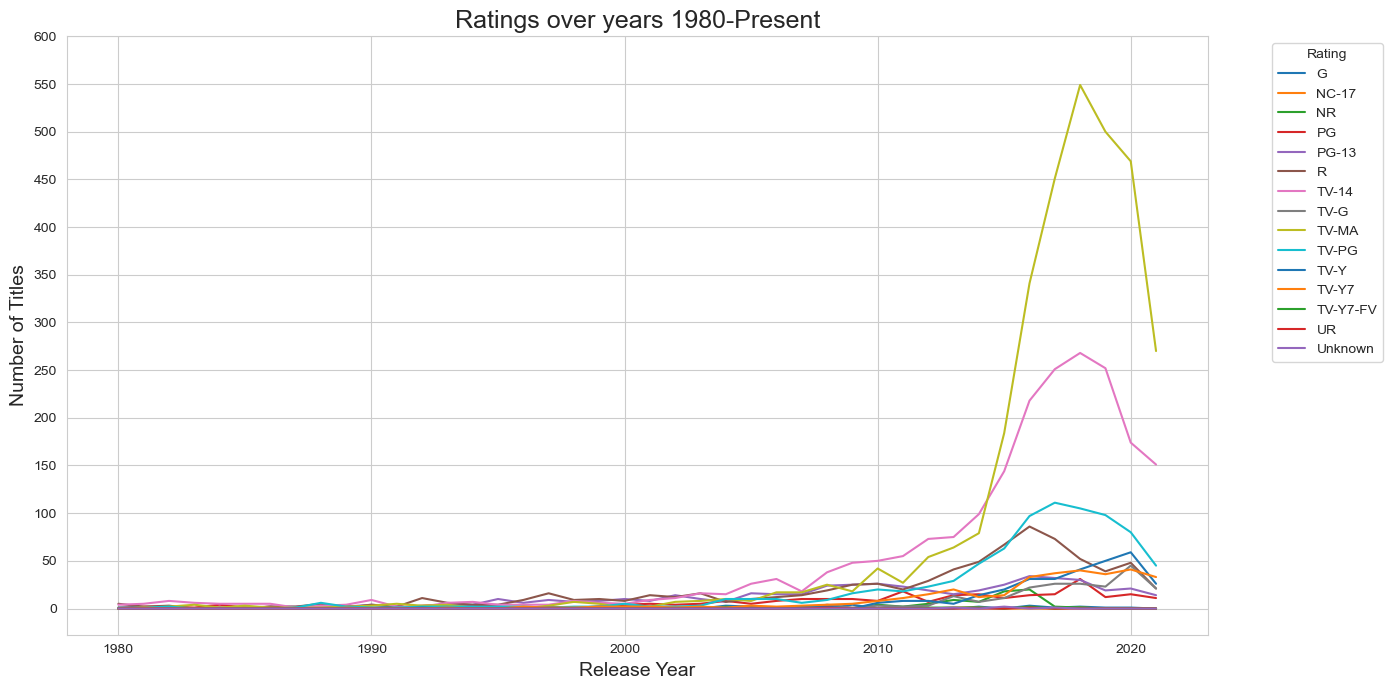

In [136]:
# So here is my focused graph, here I am focusing in on the 1980s to Present day.

# I have also decided to play around with the y axis too, with the yticks feature, so I set the range from 0 to max.max()
# The first time you call max you get the maximum value in each rating column, then do max to know the highest number of titles of a rating.
# I just added 100 to that maximum value to make it look presentable, and made the y axis increments more fine, so you can read the line graph easier.

year_against_rating_recent.plot(kind = "line" , figsize = (14,7))
plt.title("Ratings over years 1980-Present", fontsize=18)
plt.xlabel("Release Year", fontsize=14)
plt.ylabel("Number of Titles", fontsize=14)
plt.legend(title="Rating", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.yticks(range(0, year_against_rating_recent.max().max() + 100, 50))
plt.tight_layout()
plt.show()

In [98]:
# With this visualisation I can answer the question are certain ratings more prevalent in earlier years than later years
# TV-14 seems to have been the dominant rating over the years, up until around 2014 from which TV for mature audiences just took over.

In [102]:
# The next question I wanted to ask was:

# Q. Which rating cateogries dominate different countries?

In [101]:
df["country"].value_counts() # I just wanted to inspect the country column, and I have spotted an issue with the data.

# Some titles have multiple listed countries, this is going to result in some funky data. If I leave things as they are - it will
# ruin the idea of country specific contributions.

# A title with Germany and India would be counted as its own specific entity, rather than attributing that title to both Germany and India.

# This is what I therefore want to do, where there are multiple listed countries, I want to seperate that single title into multiple rows
# With each row having the same information about the title, but differing in the country that is mentioned. 

country
United States                                             2815
India                                                      972
Unknown                                                    831
United Kingdom                                             419
Japan                                                      245
                                                          ... 
Germany, Canada, United States                               1
Denmark, United Kingdom, South Africa, Sweden, Belgium       1
Serbia, South Korea, Slovenia                                1
United Kingdom, Spain, Belgium                               1
South Africa, United States, Japan                           1
Name: count, Length: 749, dtype: int64

In [106]:
# I will first make a working copy, I don't want to change the original dataframe, what I am going to do will increase the total
# number of rows, and make interpreting my data for different questions a real hassle.

df_country_rating = df.copy()

# I am going to make a function that takes a string with multiple countries, and splits it into individual countries in a list.
def split_multiple_countries(country_string):
    # Splits the string of countries by comma and strips any extra spaces
    return [i.strip() for i in country_string.split(',')]

# Applying my new function, and passing the result into a new column called country_cleaned
df_country_rating['country_cleaned'] = df_country_rating['country'].apply(split_multiple_countries)
df_country_rating

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,country_cleaned
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",[United States]
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",[South Africa]
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,[Unknown]
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",[Unknown]
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,[India]
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",[United States]
8803,s8804,TV Show,Zombie Dumb,Unknown,Unknown,Unknown,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",[Unknown]
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,[United States]
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",[United States]


In [107]:
# Now I can explode the country_cleaned column into multiple rows
df_country_rating = df_country_rating.explode('country_cleaned')
df_country_rating.shape # What I did now was check, hey has the number of rows actually increased? And it has, nearly by 2000.

(10847, 13)

In [109]:
# I feel like the dataset is now ready for me to play with. I will now group using country_cleaned and the rating column.

rating_by_country = df_country_rating.groupby(['country_cleaned', 'rating']).size().unstack(fill_value=0)
rating_by_country

rating,G,NC-17,NR,PG,PG-13,R,TV-14,TV-G,TV-MA,TV-PG,TV-Y,TV-Y7,TV-Y7-FV,UR,Unknown
country_cleaned,,,,,,,,,,,,,,,
,0,0,0,0,0,0,2,0,5,0,0,0,0,0,0
Afghanistan,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
Albania,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
Algeria,0,0,0,0,0,0,1,0,2,0,0,0,0,0,0
Angola,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vatican City,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
Venezuela,0,0,1,0,0,0,2,0,1,0,0,0,0,0,0
Vietnam,0,0,0,0,0,0,3,1,3,0,0,0,0,0,0


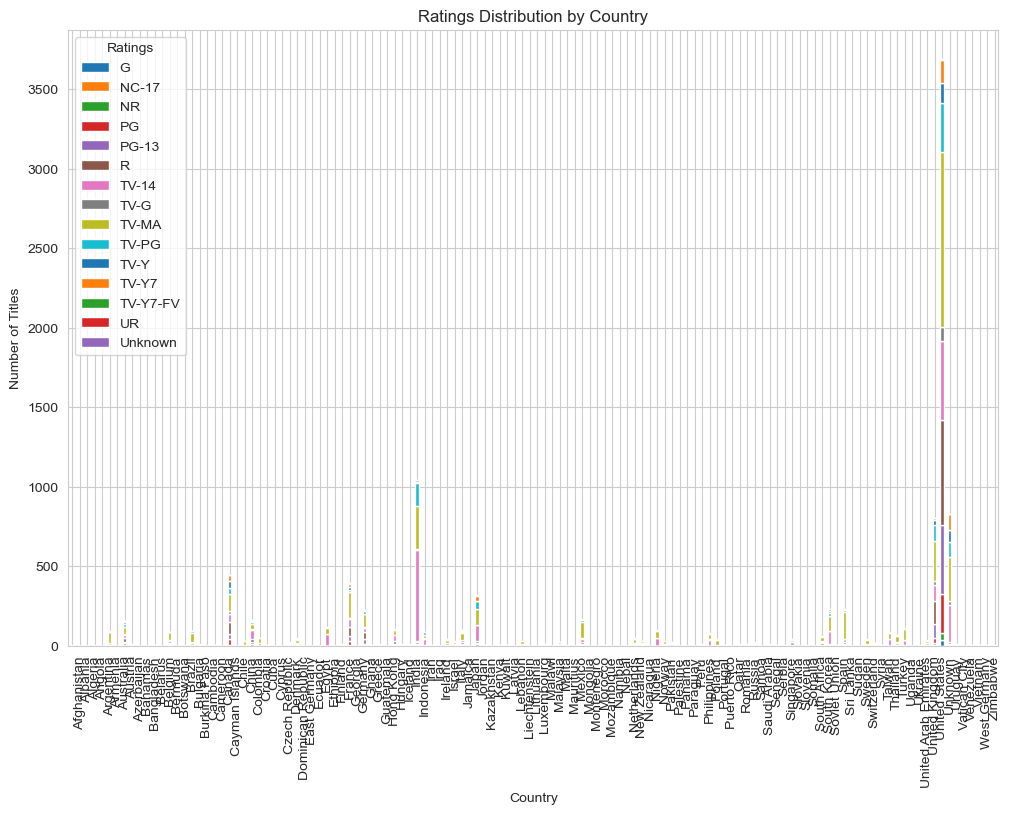

In [110]:
# The dataframe rating_by_country honestly isn't that useful, we need to visualise the data to understand it.

rating_by_country.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Ratings Distribution by Country')
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.xticks(rotation=90)
plt.legend(title='Ratings')
plt.show()


In [115]:
# Honestly, can I even extract any meaningful insights from that data above? Not really, its too crowded. Perhaps its better
# to focus on a subset of countries. Let's pivot the question to what are the most common ratings in South east asian countries?

# So I created a list of the south east asian countries, and I will use boolean filtering to select these countries.
south_east_asia = [
    'Brunei',
    'Cambodia',
    'East Timor',
    'Timor Leste' # This is the other political name for East Timor
    'Indonesia',
    'Laos',
    'Malaysia',
    'Myanmar',
    'Burma' # Could be used interchangibly with Myanmar
    'Philippines',
    'Singapore',
    'Thailand',
    'Vietnam'
]
# Due to political reasons, I have included alternative names for some countries e.g Burma / Myanmar.

df_sea = df_country_rating[df_country_rating['country_cleaned'].isin(south_east_asia)]
df_sea

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,country_cleaned
111,s112,TV Show,Sharkdog,Unknown,"Liam Mitchell, Dee Bradley Baker, Grey Griffin...","United States, Singapore",2021-09-03,2021,TV-Y,1 Season,Kids' TV,"Half shark, half dog with a big heart and a be...",Singapore
439,s440,Movie,Deep,"Sita Likitvanichkul, Jetarin Ratanaserikiat, A...","Panisara Rikulsurakan, Kay Lertsittichai, Supa...",Thailand,2021-07-16,2021,TV-MA,101 min,"Dramas, International Movies, Thrillers",Four insomniac med school students are lured i...,Thailand
508,s509,Movie,A Land Imagined,Yeo Siew Hua,"Peter Yu, Liu Xiaoyi, Guo Yue, Ishtiaque Zico,...","France, Netherlands, Singapore",2021-07-06,2019,TV-MA,95 min,"Dramas, International Movies",A cop in Singapore investigates the disappeara...,Singapore
516,s517,TV Show,Girl from Nowhere,Unknown,"Chicha Amatayakul, Thanawetch Siriwattanakul, ...",Thailand,2021-07-06,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","A mysterious, clever girl named Nanno transfer...",Thailand
531,s532,Movie,Rise: Ini Kalilah,"Saw Teong Hin, Nik Amir Mustapha, M.S. Prem Nath","Remy Ishak, Mira Filzah, Jack Tan, Sangeeta Kr...",Malaysia,2021-07-06,2018,TV-PG,101 min,"Dramas, International Movies","Inspired by Malaysia's 14th General Election, ...",Malaysia
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8653,s8654,TV Show,Ugly Duckling,Unknown,"Mook Worranit Thawornwong, Puttichai Kasetsin,...",Thailand,2019-02-15,2015,TV-14,4 Seasons,"International TV Shows, Romantic TV Shows, TV ...",Young women face up to their insecurities and ...,Thailand
8738,s8739,Movie,Why Knot,Dhruv Dhawan,Unknown,"Canada, India, Thailand, United States, United...",2017-10-15,2016,TV-MA,84 min,Documentaries,"Pressured by his traditional family to marry, ...",Thailand
8777,s8778,Movie,Yes or No,Saratswadee Wongsomphet,"Sushar Manaying, Supanart Jittaleela, Arisara ...",Thailand,2018-12-06,2010,TV-PG,111 min,"International Movies, LGBTQ Movies, Romantic M...",Traditional girl Pie is initially uncomfortabl...,Thailand
8778,s8779,Movie,Yes or No 2,Saratswadee Wongsomphet,"Supanart Jittaleela, Sushar Manaying, Nisa Boo...",Thailand,2018-11-08,2012,TV-PG,112 min,"International Movies, LGBTQ Movies, Romantic M...","No longer university girls, Kim and Pie face n...",Thailand


In [116]:
# Now its time to groupby country and the rating

rating_by_sea_country = df_sea.groupby(['country_cleaned', 'rating']).size().unstack(fill_value=0)

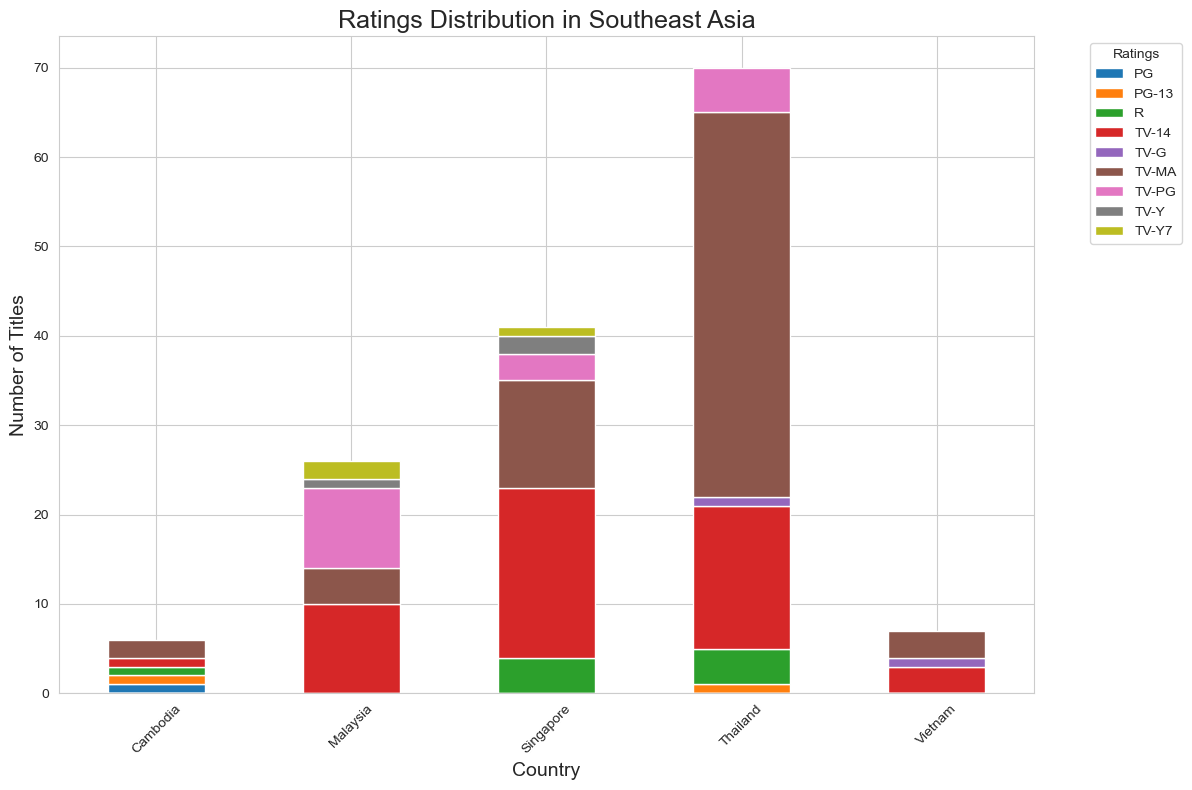

In [134]:
rating_by_sea_country.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Ratings Distribution in Southeast Asia',fontsize=18)
plt.xlabel('Country',fontsize=14)
plt.ylabel('Number of Titles',fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Ratings', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [ ]:
# This is actually amazing, I can make some key observations from this graph quite easily, that gives me an insight into 
# country and regional consumption preferences.

# Look, Malaysia has no R rated content at all. This may be due to strict cultural / religious or censorship regulation that
# prevents the presentation of explicit content. 

In [120]:
# There is one last question I want to try and answer:

# That is, where are the countries with the fastest growing production of content?

country_year_counts = df_country_rating.groupby(['release_year', 'country_cleaned']).size().reset_index(name='title_count')

# Filtering for 2010 onwards, I want to get a taste of modern trends not everything from 1980 onwards

country_year_counts = country_year_counts[country_year_counts['release_year'] >= 2010]
country_year_counts.head()

,release_year,country_cleaned,title_count
475,2010,Australia,8
476,2010,Canada,14
477,2010,China,4
478,2010,Colombia,1
479,2010,Egypt,5


In [121]:
country_year_pivot = country_year_counts.pivot(index='release_year', columns='country_cleaned', values='title_count').fillna(0)
country_year_pivot

country_cleaned,,Afghanistan,Albania,Algeria,Angola,Argentina,Armenia,Australia,Austria,Azerbaijan,...,Ukraine,United Arab Emirates,United Kingdom,United States,Unknown,Uruguay,Vatican City,Venezuela,Vietnam,Zimbabwe
release_year,,,,,,,,,,,,,,,,,,,,,
2010,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,...,0.0,0.0,18.0,84.0,16.0,0.0,0.0,0.0,0.0,0.0
2011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,22.0,85.0,6.0,0.0,0.0,0.0,0.0,0.0
2012,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,...,0.0,3.0,22.0,101.0,15.0,0.0,0.0,0.0,0.0,0.0
2013,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,1.0,...,0.0,0.0,29.0,112.0,18.0,0.0,0.0,0.0,0.0,0.0
2014,2.0,0.0,0.0,1.0,0.0,1.0,0.0,4.0,1.0,0.0,...,0.0,5.0,46.0,138.0,19.0,0.0,0.0,1.0,1.0,1.0
2015,0.0,0.0,0.0,0.0,0.0,7.0,0.0,17.0,0.0,0.0,...,2.0,4.0,66.0,209.0,44.0,2.0,0.0,0.0,1.0,0.0
2016,0.0,1.0,0.0,0.0,0.0,11.0,0.0,18.0,2.0,0.0,...,0.0,5.0,102.0,348.0,64.0,0.0,0.0,1.0,1.0,0.0
2017,0.0,0.0,0.0,0.0,0.0,14.0,1.0,20.0,2.0,0.0,...,1.0,3.0,101.0,441.0,66.0,3.0,0.0,1.0,0.0,2.0
2018,2.0,0.0,1.0,0.0,0.0,17.0,0.0,20.0,3.0,0.0,...,0.0,6.0,96.0,457.0,109.0,3.0,1.0,0.0,0.0,0.0


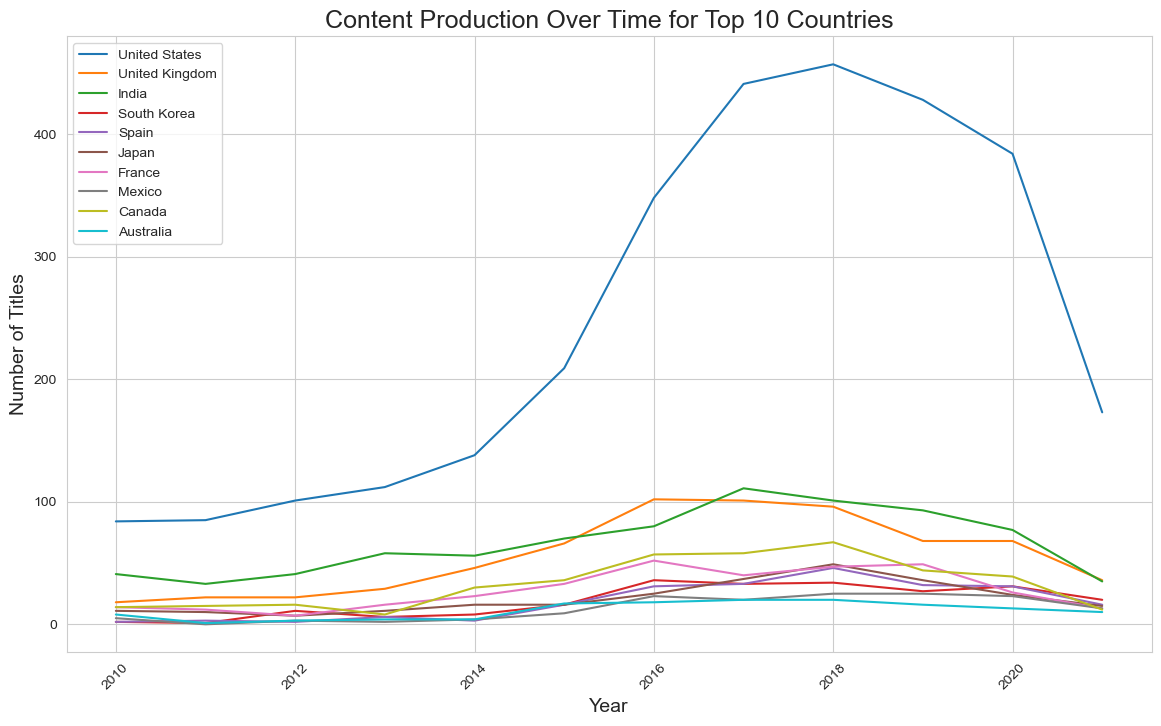

In [133]:
# Get the top 10 countries with the most titles in the last year, however get rid of the Unknown column
country_year_pivot_cleaned = country_year_pivot.drop(columns=['Unknown'], errors='ignore')

top_countries = country_year_pivot_cleaned.iloc[-1].sort_values(ascending=False).head(10).index

# Plot for top 10 countries
plt.figure(figsize=(14, 8))

for country in top_countries:
    plt.plot(country_year_pivot.index, country_year_pivot[country], label=country)

plt.title('Content Production Over Time for Top 10 Countries',fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Titles', fontsize=14)
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()
